In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df[df['TotalCharges'].isna()]

# drop them:
df = df[df['TotalCharges'].notna()] #check the rows left

In [5]:
#drop irrelevent column (Not useful for modeling)
df = df.drop(columns = ['customerID'])


In [6]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes', 0:'No'})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<Axes: xlabel='Churn'>

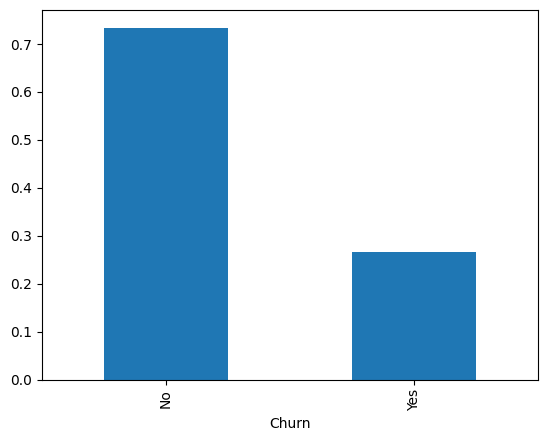

In [7]:
df['Churn'].value_counts(normalize = True).plot(kind = 'bar')

<Axes: title={'center': 'MonthlyCharges'}, xlabel='Churn'>

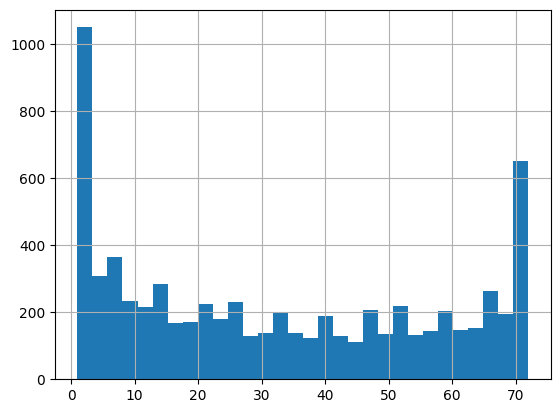

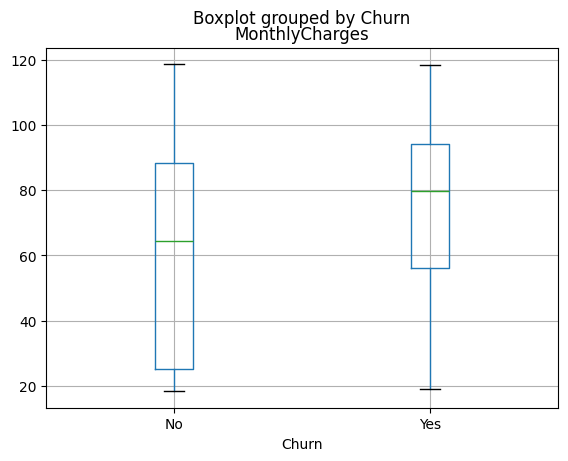

In [8]:
df['tenure'].hist(bins = 30)
df.boxplot(column = 'MonthlyCharges', by='Churn')

####  large number of customers with very short tenure, but some have stayed for a long time
#### customers who churned  tend to pay higher monthly charges on average, The median monthly charge for churned customers is higher, suggesting that more expensive plans may be associated with higher churn.

<Axes: xlabel='Contract'>

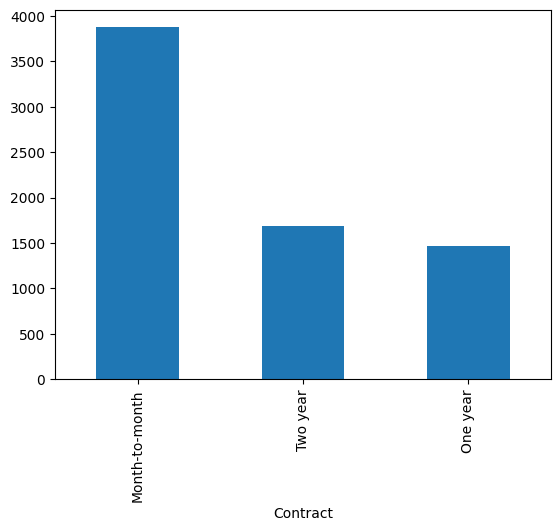

In [9]:
df['Contract'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Churn'>

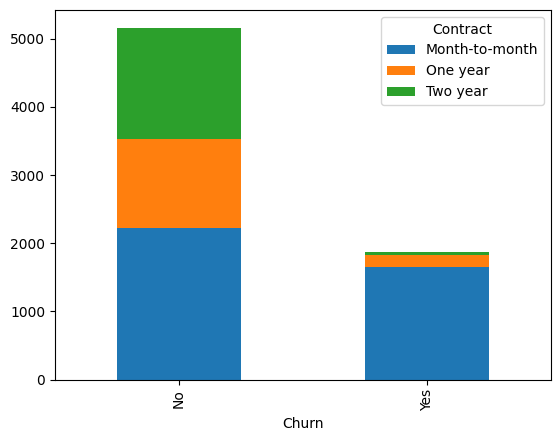

In [10]:
# contract types are distributed for churned vs. non-churned customers.
pd.crosstab(df['Churn'], df['Contract']).plot(kind = 'bar', stacked = True)

#### Customers who churned are more likely to be on a month-to-month contract."For churn = No, Month-to-month also has a big portion, but there are more customers with One year and Two year contracts.

<Axes: xlabel='Contract'>

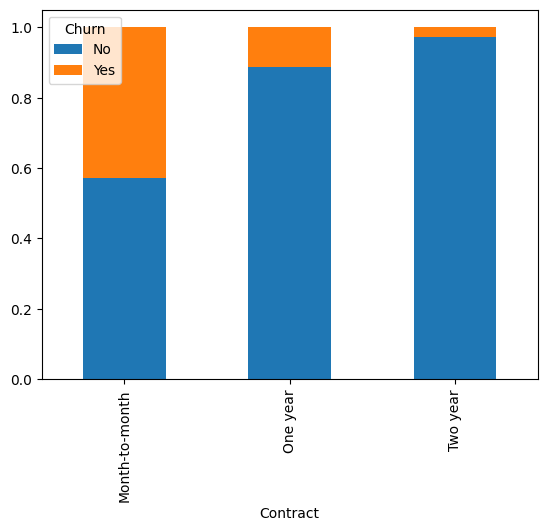

In [11]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

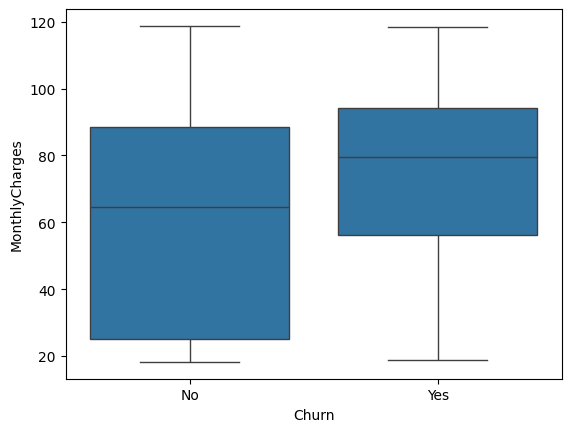

In [12]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data  = df)

<Axes: xlabel='tenure', ylabel='Count'>

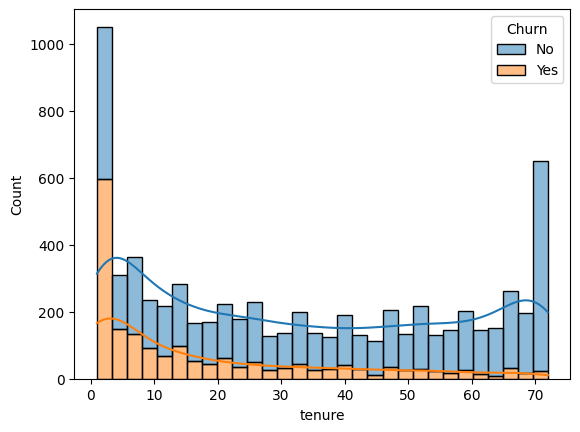

In [13]:

#tenure between churned and non-churned customers
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, multiple='stack')


<Axes: xlabel='TechSupport'>

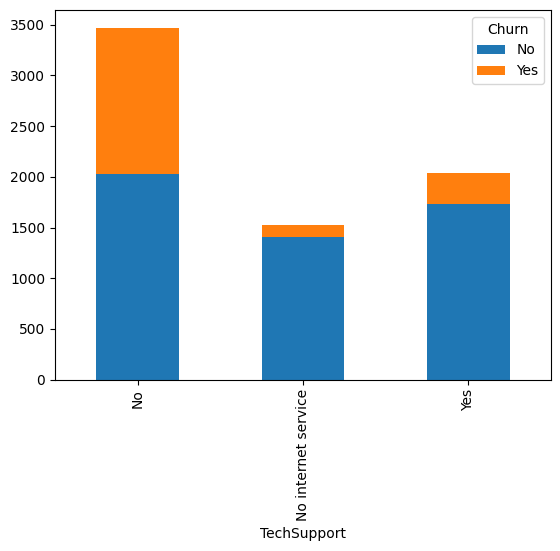

In [14]:
#do customers with tech support is more likely not to churn ?

pd.crosstab(df['TechSupport'], df['Churn']).plot(kind= 'bar', stacked = True)

#### People with no tech support ("No") have the highest number of churn. People with tech support ("Yes") are more likely to stay.


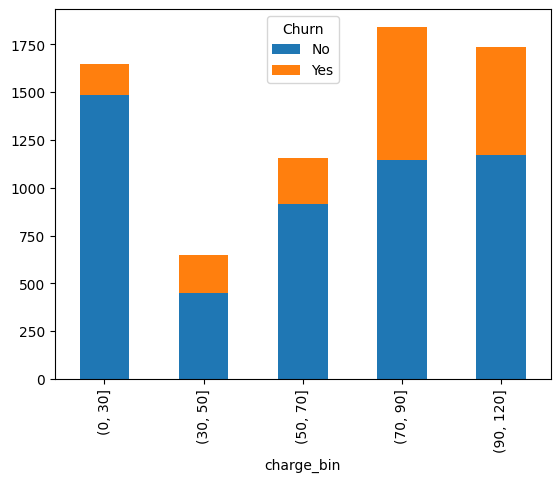

In [15]:
df['charge_bin'] = pd.cut(df['MonthlyCharges'], bins=[0, 30, 50, 70, 90, 120])
churn_by_bin = pd.crosstab(df['charge_bin'], df['Churn']).plot(kind = 'bar', stacked = True)



#### This suggests a churn threshold around 70 — when charges go above this, churn spikes.

In [16]:
df['tenure_group'] = pd.cut(df['tenure'], bins = [0,12,24,48,72], labels = ['0-12', '13-24','25-48','49-72'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_bin,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(0, 30]",0-12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,"(50, 70]",25-48
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(50, 70]",0-12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(30, 50]",25-48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(70, 90]",0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(70, 90]",13-24
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(90, 120]",49-72
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(0, 30]",0-12
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(70, 90]",0-12


In [17]:
# flag the high monthly charges, 

df['high_charges'] = df['MonthlyCharges']> 70



In [18]:
# tech support label
df['has_tech_support'] = df['TechSupport'].apply(lambda x : 1 if x == 'Yes' else 0 )


In [19]:
df = pd.get_dummies(df, columns=['Contract'], drop_first=True)
df 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_bin,tenure_group,high_charges,has_tech_support,Contract_One year,Contract_Two year
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,No,"(0, 30]",0-12,False,0,False,False
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,No,"(50, 70]",25-48,False,0,True,False
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,"(50, 70]",0-12,False,0,False,False
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,"(30, 50]",25-48,False,1,True,False
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,"(70, 90]",0-12,True,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Mailed check,84.80,1990.50,No,"(70, 90]",13-24,True,1,True,False
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Credit card (automatic),103.20,7362.90,No,"(90, 120]",49-72,True,0,True,False
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Electronic check,29.60,346.45,No,"(0, 30]",0-12,False,0,False,False
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Mailed check,74.40,306.60,Yes,"(70, 90]",0-12,True,0,False,False


In [20]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['num_service'] = df[services].apply(lambda row: sum(row == 'Yes'), axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,charge_bin,tenure_group,high_charges,has_tech_support,Contract_One year,Contract_Two year,num_service
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,No,"(0, 30]",0-12,False,0,False,False,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,No,"(50, 70]",25-48,False,0,True,False,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,Yes,"(50, 70]",0-12,False,0,False,False,3
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,No,"(30, 50]",25-48,False,1,True,False,3
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,Yes,"(70, 90]",0-12,True,0,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,84.80,1990.50,No,"(70, 90]",13-24,True,1,True,False,6
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,103.20,7362.90,No,"(90, 120]",49-72,True,0,True,False,5
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,29.60,346.45,No,"(0, 30]",0-12,False,0,False,False,1
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,74.40,306.60,Yes,"(70, 90]",0-12,True,0,False,False,1


<Axes: >

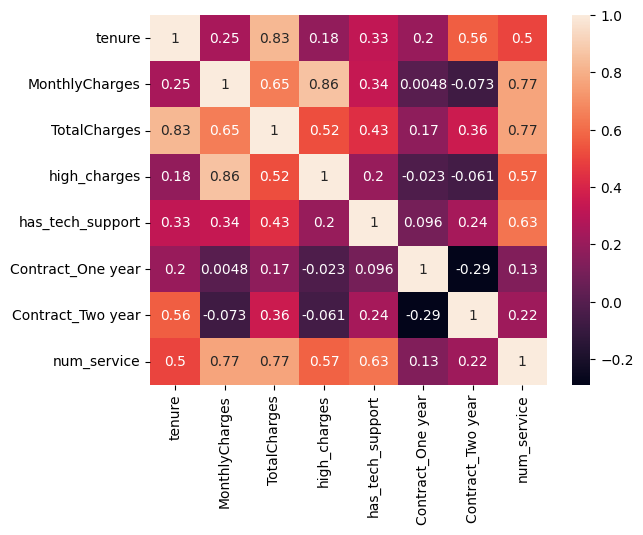

In [21]:
sns.heatmap(df.corr(numeric_only= True),annot = True)

### Checking VIF

In [22]:
df['Contract_One year'] =  df['Contract_One year'].astype(int)
df['Contract_Two year'] = df['Contract_Two year'].astype(int)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = ['MonthlyCharges', 'tenure', 'TotalCharges', 'num_service', 'Contract_One year', 'Contract_Two year']
X = df[features]
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

             feature        VIF
0     MonthlyCharges   9.674682
1             tenure  11.433487
2       TotalCharges   9.768115
3        num_service  13.507814
4  Contract_One year   1.882881
5  Contract_Two year   3.090097


In [24]:
#drop  TotalCharges, and seervices (phone, security.etc) we leave the num_service
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'charge_bin', 'tenure_group',
       'high_charges', 'has_tech_support', 'Contract_One year',
       'Contract_Two year', 'num_service'],
      dtype='object')

In [25]:
df = df.drop(['PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling'], axis =1, errors = 'ignore')

df

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_bin,tenure_group,high_charges,has_tech_support,Contract_One year,Contract_Two year,num_service
0,Female,No,Yes,No,1,DSL,Electronic check,29.85,29.85,No,"(0, 30]",0-12,False,0,0,0,1
1,Male,No,No,No,34,DSL,Mailed check,56.95,1889.50,No,"(50, 70]",25-48,False,0,1,0,3
2,Male,No,No,No,2,DSL,Mailed check,53.85,108.15,Yes,"(50, 70]",0-12,False,0,0,0,3
3,Male,No,No,No,45,DSL,Bank transfer (automatic),42.30,1840.75,No,"(30, 50]",25-48,False,1,1,0,3
4,Female,No,No,No,2,Fiber optic,Electronic check,70.70,151.65,Yes,"(70, 90]",0-12,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,DSL,Mailed check,84.80,1990.50,No,"(70, 90]",13-24,True,1,1,0,6
7039,Female,No,Yes,Yes,72,Fiber optic,Credit card (automatic),103.20,7362.90,No,"(90, 120]",49-72,True,0,1,0,5
7040,Female,No,Yes,Yes,11,DSL,Electronic check,29.60,346.45,No,"(0, 30]",0-12,False,0,0,0,1
7041,Male,Yes,Yes,No,4,Fiber optic,Mailed check,74.40,306.60,Yes,"(70, 90]",0-12,True,0,0,0,1


In [26]:
#binary encoding
binary_map = {'Yes':1, 'No':0, 'Male':1, 'Female':0}
df.replace(binary_map, inplace = True)

#one-hot encoding
df['high_charges'] = df['high_charges'].astype('int')
df = pd.get_dummies(df, columns = ['InternetService','PaymentMethod'], drop_first = True)

#Target encoding
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

/var/folders/y0/v8s1rk113f5gqq_dvtthdf840000gn/T/ipykernel_82470/3651235139.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(binary_map, inplace = True)


In [27]:
dummy_columns = [col for col in df.columns if 'InternetService' in col or 'PaymentMethod' in col]
df[dummy_columns] = df[dummy_columns].astype(int)

df

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn,charge_bin,tenure_group,high_charges,has_tech_support,Contract_One year,Contract_Two year,num_service,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,29.85,29.85,0,"(0, 30]",0-12,0,0,0,0,1,1,0,0,1,0
1,1,0,0,0,34,56.95,1889.50,0,"(50, 70]",25-48,0,0,1,0,3,1,0,0,0,1
2,1,0,0,0,2,53.85,108.15,1,"(50, 70]",0-12,0,0,0,0,3,1,0,0,0,1
3,1,0,0,0,45,42.30,1840.75,0,"(30, 50]",25-48,0,1,1,0,3,1,0,0,0,0
4,0,0,0,0,2,70.70,151.65,1,"(70, 90]",0-12,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,84.80,1990.50,0,"(70, 90]",13-24,1,1,1,0,6,1,0,0,0,1
7039,0,0,1,1,72,103.20,7362.90,0,"(90, 120]",49-72,1,0,1,0,5,0,1,1,0,0
7040,0,0,1,1,11,29.60,346.45,0,"(0, 30]",0-12,0,0,0,0,1,1,0,0,1,0
7041,1,1,1,0,4,74.40,306.60,1,"(70, 90]",0-12,1,0,0,0,1,0,1,0,0,1


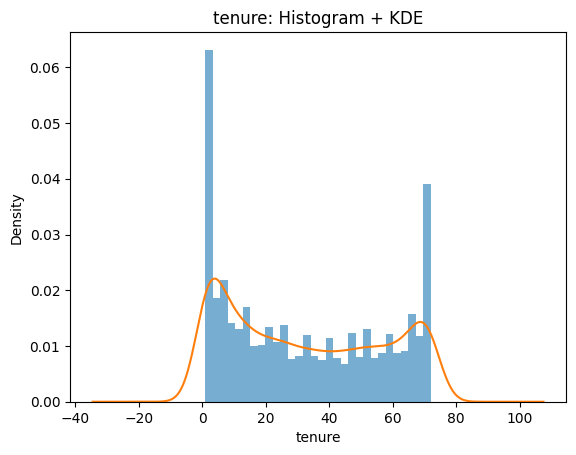

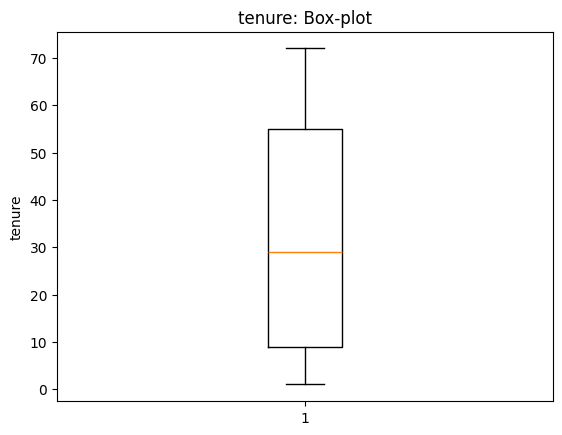

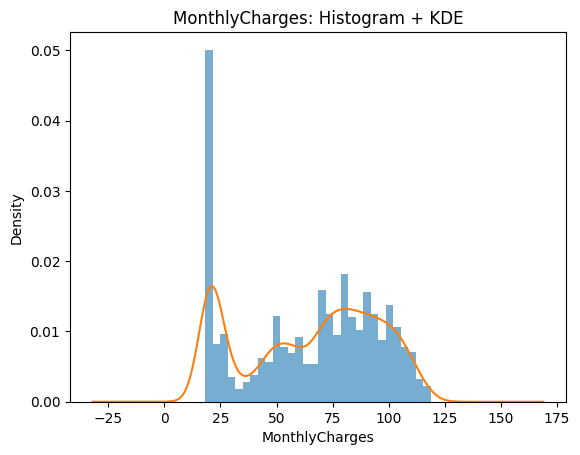

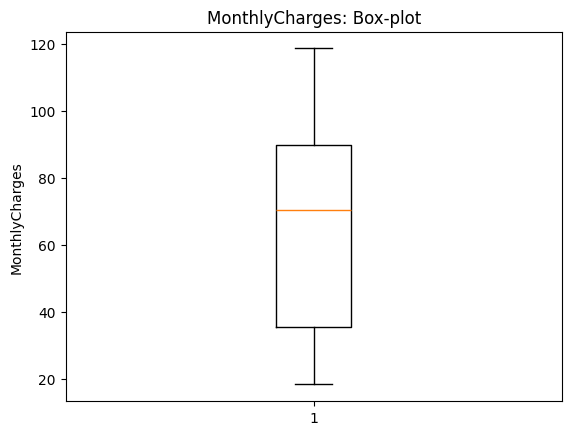

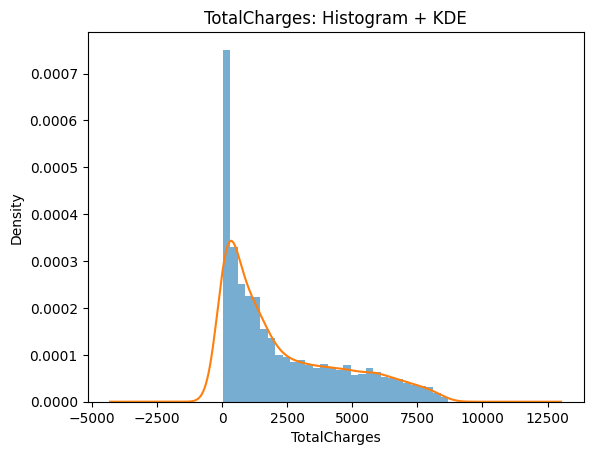

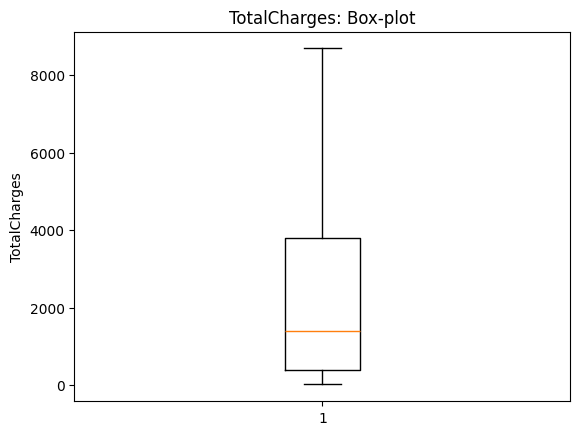

In [28]:
#check the distribution of tenure, MonthlyCharges, and TotalCharges
import matplotlib.pyplot as plt

num_cols = ['tenure','MonthlyCharges','TotalCharges']

for col in num_cols:
    series = pd.to_numeric(df[col], errors='coerce').dropna()

    # ---- Histogram + KDE ----
    plt.figure()
    plt.hist(series, bins=30, alpha=0.6, density=True)
    series.plot(kind='kde')                       # KDE curve
    plt.title(f"{col}: Histogram + KDE")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

    # ---- Box-plot ----
    plt.figure()
    plt.boxplot(series, vert=True, showfliers=True)
    plt.title(f"{col}: Box-plot")
    plt.ylabel(col)
    plt.show()







In [29]:
# standardcaaler : tenure, monthly charges. / total charges: log + standard

from sklearn.preprocessing import StandardScaler

df['Log_TotalCharges'] = np.log1p(pd.to_numeric(df['TotalCharges'], errors = 'coerce'))

#z-score (StandardScaler)

cols_to_scale = ['tenure', 'MonthlyCharges', 'Log_TotalCharges']

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[cols_to_scale])

scaled_cols = [f"{col}_scaled" for col in cols_to_scale]
df[scaled_cols] = pd.DataFrame(df_scaled, columns=scaled_cols, index=df.index)

df[scaled_cols].describe()

,tenure_scaled,MonthlyCharges_scaled,Log_TotalCharges_scaled
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,6.062651e-17,1.010442e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-2.559421e+00
25%,-9.542963e-01,-9.709769e-01,-6.116529e-01
50%,-1.394171e-01,1.845440e-01,1.938466e-01
75%,9.199259e-01,8.331482e-01,8.395674e-01
max,1.612573e+00,1.793381e+00,1.374907e+00


In [30]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [31]:
features = [
    'tenure_scaled', 'MonthlyCharges_scaled', 'Log_TotalCharges_scaled',
    'gender','SeniorCitizen', 'Partner', 'Dependents', 'high_charges',

    # One-hot encoding 
    'Contract_One year', 'Contract_Two year',
    'InternetService_DSL', 'InternetService_Fiber optic',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',


    'num_service'
]


In [32]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score


X = df[features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42
)


neg, pos = np.bincount(y_train)
scale_ratio = neg / pos

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
log_probs = log_model.predict_proba(X_test)[:, 1]
log_preds = (log_probs >= 0.5).astype(int)
log_auc = roc_auc_score(y_test, log_probs)
log_precision = precision_score(y_test, log_preds)
log_recall = recall_score(y_test, log_preds)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_ratio)
xgb_model.fit(X_train, y_train)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_preds = (xgb_probs >= 0.5).astype(int)
xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)


print(f"Logistic Regression AUC:     {log_auc:.4f}")
print(f"Logistic Regression Precision: {log_precision:.4f}")
print(f"Logistic Regression Recall:    {log_recall:.4f}")
print("")

print(f"XGBoost AUC:                  {xgb_auc:.4f}")
print(f"XGBoost Precision:            {xgb_precision:.4f}")
print(f"XGBoost Recall:               {xgb_recall:.4f}")

Logistic Regression AUC:     0.8307
Logistic Regression Precision: 0.4934
Logistic Regression Recall:    0.7941

XGBoost AUC:                  0.8138
XGBoost Precision:            0.5132
XGBoost Recall:               0.6765


In [33]:


df['charge_bin_str'] = df['charge_bin'].astype(str)
df['tenure_group_str'] = df['tenure_group'].astype(str)


charge_order = ['(0, 30]', '(30, 50]', '(50, 70]', '(70, 90]', '(90, 120]']
df['charge_bin_ord'] = df['charge_bin_str'].apply(lambda x: charge_order.index(x))

tenure_order = ['0-12', '13-24', '25-48', '49-72']
df['tenure_group_ord'] = df['tenure_group_str'].apply(lambda x: tenure_order.index(x))

df[['charge_bin', 'charge_bin_str', 'charge_bin_ord']].head()



,charge_bin,charge_bin_str,charge_bin_ord
0,"(0, 30]","(0, 30]",0
1,"(50, 70]","(50, 70]",2
2,"(50, 70]","(50, 70]",2
3,"(30, 50]","(30, 50]",1
4,"(70, 90]","(70, 90]",3


In [34]:
feature_updated = [
    'tenure_scaled', 'MonthlyCharges_scaled', 'Log_TotalCharges_scaled',
    'gender','SeniorCitizen', 'Partner', 'Dependents', 'high_charges',

    # One-hot encoding 
    'Contract_One year', 'Contract_Two year',
    'InternetService_DSL', 'InternetService_Fiber optic',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',

    
    'num_service', 'charge_bin_ord', 'tenure_group_ord'
]

In [35]:
X = df[feature_updated]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

eg, pos = np.bincount(y_train)
scale_ratio = neg / pos

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
log_probs = log_model.predict_proba(X_test)[:, 1]
log_preds = (log_probs >= 0.5).astype(int)
log_auc = roc_auc_score(y_test, log_probs)
log_precision = precision_score(y_test, log_preds)
log_recall = recall_score(y_test, log_preds)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_ratio)
xgb_model.fit(X_train, y_train)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_preds = (xgb_probs >= 0.5).astype(int)
xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)


print(f"Logistic Regression AUC:     {log_auc:.4f}")
print(f"Logistic Regression Precision: {log_precision:.4f}")
print(f"Logistic Regression Recall:    {log_recall:.4f}")
print("")

print(f"XGBoost AUC:                  {xgb_auc:.4f}")
print(f"XGBoost Precision:            {xgb_precision:.4f}")
print(f"XGBoost Recall:               {xgb_recall:.4f}")


Logistic Regression AUC:     0.8363
Logistic Regression Precision: 0.4967
Logistic Regression Recall:    0.8021

XGBoost AUC:                  0.8130
XGBoost Precision:            0.5266
XGBoost Recall:               0.6872


### Hugging Face

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import joblib

# 
feature_updated = [
    'tenure_scaled', 'MonthlyCharges_scaled', 'Log_TotalCharges_scaled',
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'high_charges',
    'Contract_One year', 'Contract_Two year',
    'InternetService_DSL', 'InternetService_Fiber optic',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'num_service', 'charge_bin_ord', 'tenure_group_ord'
]


df['Log_TotalCharges'] = np.log1p(pd.to_numeric(df['TotalCharges'], errors='coerce')).fillna(0)


cols_to_scale = ['tenure', 'MonthlyCharges', 'Log_TotalCharges']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cols_to_scale])
scaled_cols = [col + "_scaled" for col in cols_to_scale]
df[scaled_cols] = pd.DataFrame(df_scaled, columns=scaled_cols, index=df.index)


X = df[feature_updated]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, prob)
print(f"新模型 AUC: {auc:.4f}")


joblib.dump(model, "logistic_model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("logistic_model.joblib 和 scaler.joblib 已儲存完畢")


新模型 AUC: 0.8363
logistic_model.joblib 和 scaler.joblib 已儲存完畢


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature


feature_sets = {
    "base_features": [
        'tenure_scaled', 'MonthlyCharges_scaled', 'Log_TotalCharges_scaled',
        'gender','SeniorCitizen', 'Partner', 'Dependents', 'high_charges',
        'Contract_One year', 'Contract_Two year',
        'InternetService_DSL', 'InternetService_Fiber optic',
        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
        'PaymentMethod_Mailed check', 'num_service'
    ],
    "updated_features": [
        'tenure_scaled', 'MonthlyCharges_scaled', 'Log_TotalCharges_scaled',
        'gender','SeniorCitizen', 'Partner', 'Dependents', 'high_charges',
        'Contract_One year', 'Contract_Two year',
        'InternetService_DSL', 'InternetService_Fiber optic',
        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
        'PaymentMethod_Mailed check', 'num_service',
        'charge_bin_ord', 'tenure_group_ord'
    ]
}


for feature_name, features in feature_sets.items():
    X = df[features]
    y = df['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    neg, pos = np.bincount(y_train)
    scale_ratio = neg / pos

    with mlflow.start_run(run_name=f"Churn Prediction - {feature_name}"):
        # 記錄 feature 使用
        mlflow.log_param("feature_set", feature_name)

        # ----- Logistic Regression -----
        log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
        log_model.fit(X_train, y_train)
        log_probs = log_model.predict_proba(X_test)[:, 1]
        log_preds = (log_probs >= 0.5).astype(int)

        log_auc = roc_auc_score(y_test, log_probs)
        log_precision = precision_score(y_test, log_preds)
        log_recall = recall_score(y_test, log_preds)

        mlflow.log_param("log_model", "LogisticRegression")
        mlflow.log_metric("log_auc", log_auc)
        mlflow.log_metric("log_precision", log_precision)
        mlflow.log_metric("log_recall", log_recall)
        mlflow.sklearn.log_model(
            sk_model=log_model,
            artifact_path="logistic_model",
            input_example=X_test.iloc[:1],
            signature=infer_signature(X_test, log_model.predict(X_test))
        )

        # ----- XGBoost -----
        xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_ratio)
        xgb_model.fit(X_train, y_train)
        xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
        xgb_preds = (xgb_probs >= 0.5).astype(int)

        xgb_auc = roc_auc_score(y_test, xgb_probs)
        xgb_precision = precision_score(y_test, xgb_preds)
        xgb_recall = recall_score(y_test, xgb_preds)

        mlflow.log_param("xgb_model", "XGBoost")
        mlflow.log_metric("xgb_auc", xgb_auc)
        mlflow.log_metric("xgb_precision", xgb_precision)
        mlflow.log_metric("xgb_recall", xgb_recall)
        mlflow.sklearn.log_model(
            sk_model=xgb_model,
            artifact_path="xgb_model",
            input_example=X_test.iloc[:1],
            signature=infer_signature(X_test, xgb_model.predict(X_test))
        )


/opt/homebrew/Caskroom/miniforge/base/envs/azureml_env/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/06/12 19:53:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/homebrew/Caskroom/miniforge/base/envs/azureml_env/lib/python3.10/site-packages/mlflow/types/

### Hugging Face


In [ ]:
import gradio as gr
import pandas as pd
import joblib

/opt/homebrew/Caskroom/miniforge/base/envs/azureml_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
